
  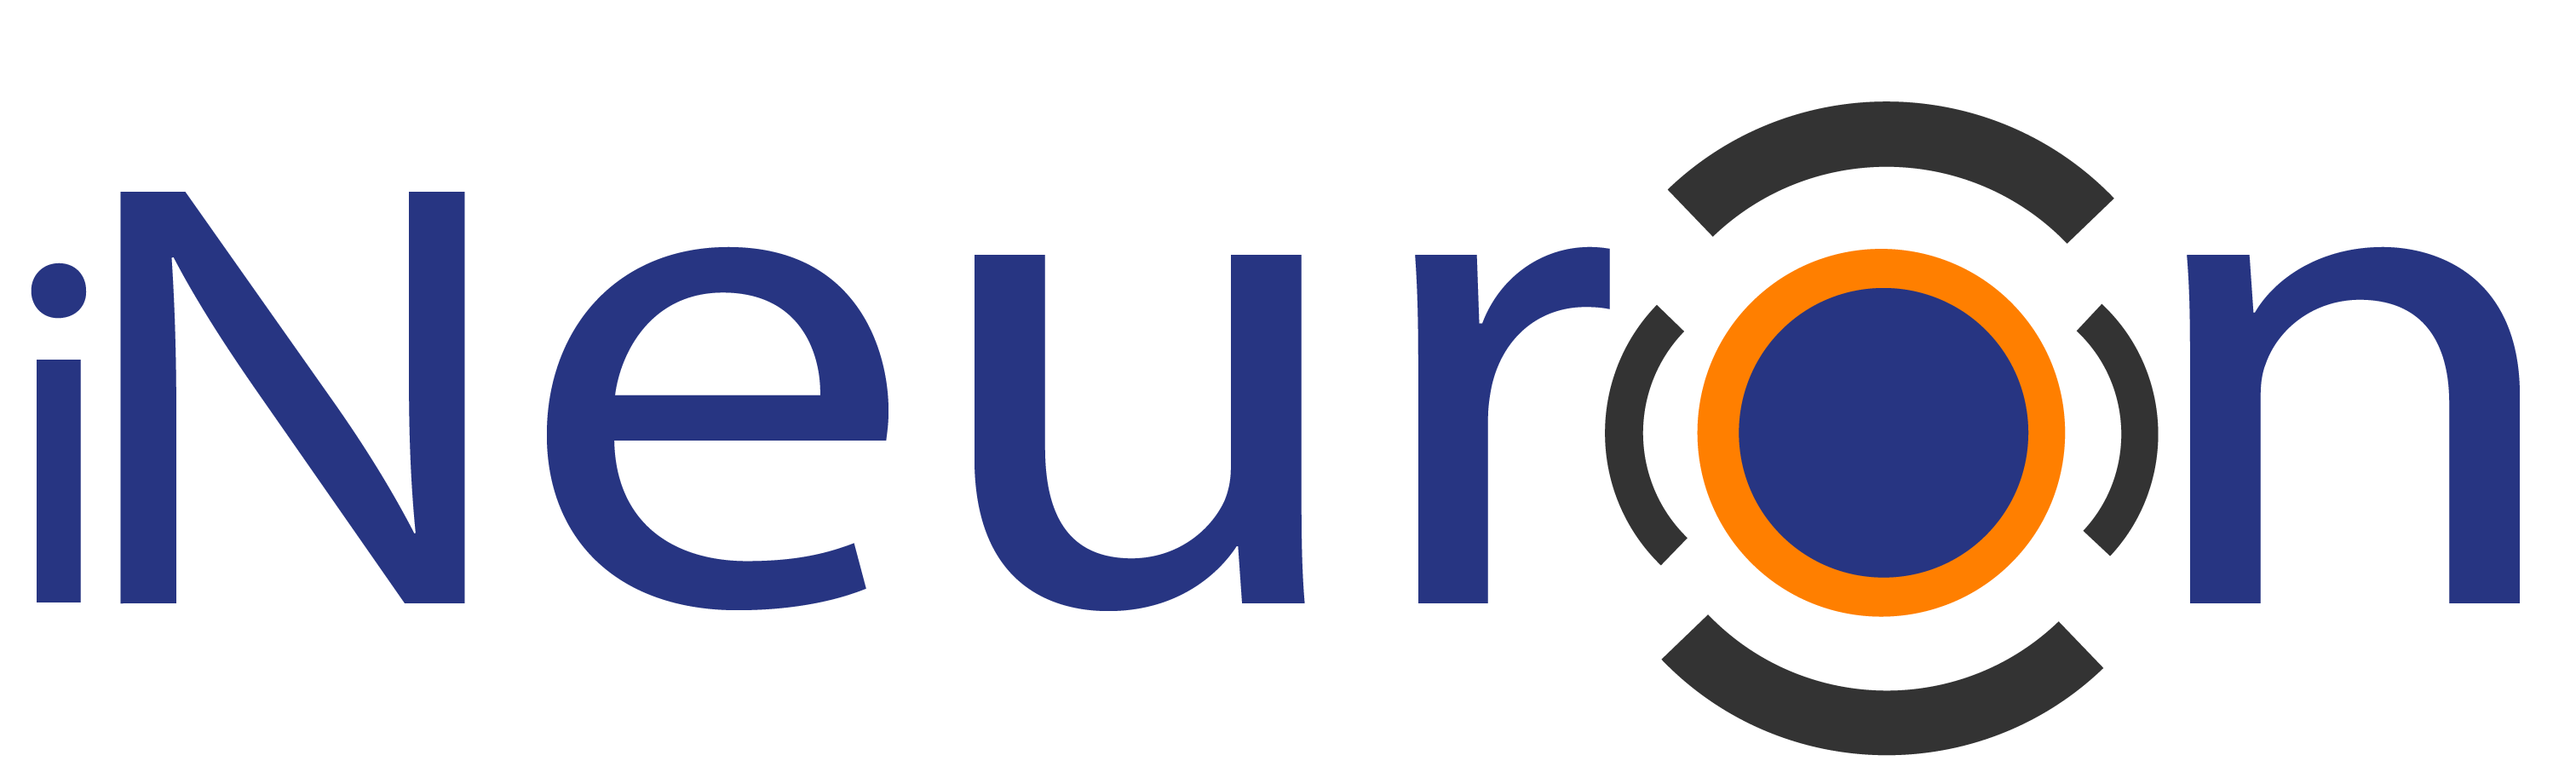

# Class - 48 `Decision Tree Regression`  

## 12 November 2022
In this class **Krish Naik Sir** taught the theory of **Decision Tree Regression** 

## DTR Validation
In Decision Tree Regression the Validation checks through the following measures:
* **MSE** 
$$MSE= \frac{1}{n}\sum_{i=1}^n(Y-\hat{Y})^2$$
* **MAE**
* **RMSE**
* **Reduction Variance** 
$$\text{Reduction in Variance}= Variance(Root Node)- \sum_{i=1}^n w_i \times Variance(Child Node)$$

In [31]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [32]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [37]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [38]:
len(df['quality'].unique())

6

In [39]:
df['quality'].nunique()

6

In [40]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [41]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [42]:
df.duplicated().sum()


240

In [43]:
df=df.drop_duplicates()

In [44]:
df.duplicated().sum()

0

In [11]:
demo_df=pd.DataFrame([1,2,3,3,23,2,1,2,123,333])

In [12]:
demo_df

0
0    1
1    2
2    3
3    3
4   23
5    2
6    1
7    2
8  123
9  333

In [13]:
demo_df.duplicated().sum()

4

In [45]:
X=df.drop("quality",axis=1)

In [46]:
y=df['quality']

In [47]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [18]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
scr.fit()
scr.transform()
'''
# No need of Standardization because DT depends on Yes/No OR Decisions

'from sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import StandardScaler\nsclr = StandardScaler()\nscr.fit()\nscr.transform()'

In [49]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [50]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
model.score(X_train,y_train)

1.0

[Text(0.5219298245614035, 0.9166666666666666, 'X[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.27631578947368424, 0.75, 'X[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.14035087719298245, 0.5833333333333334, 'X[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.07017543859649122, 0.4166666666666667, 'X[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.03508771929824561, 0.25, 'X[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.017543859649122806, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.05263157894736842, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.10526315789473684, 0.25, 'X[7] <= 0.996\ngini = 0.547\nsamples = 92\nvalue = [1, 0, 24, 56, 11, 0]'),
 Text(0.08771929824561403, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.12280701754385964, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.210526315789

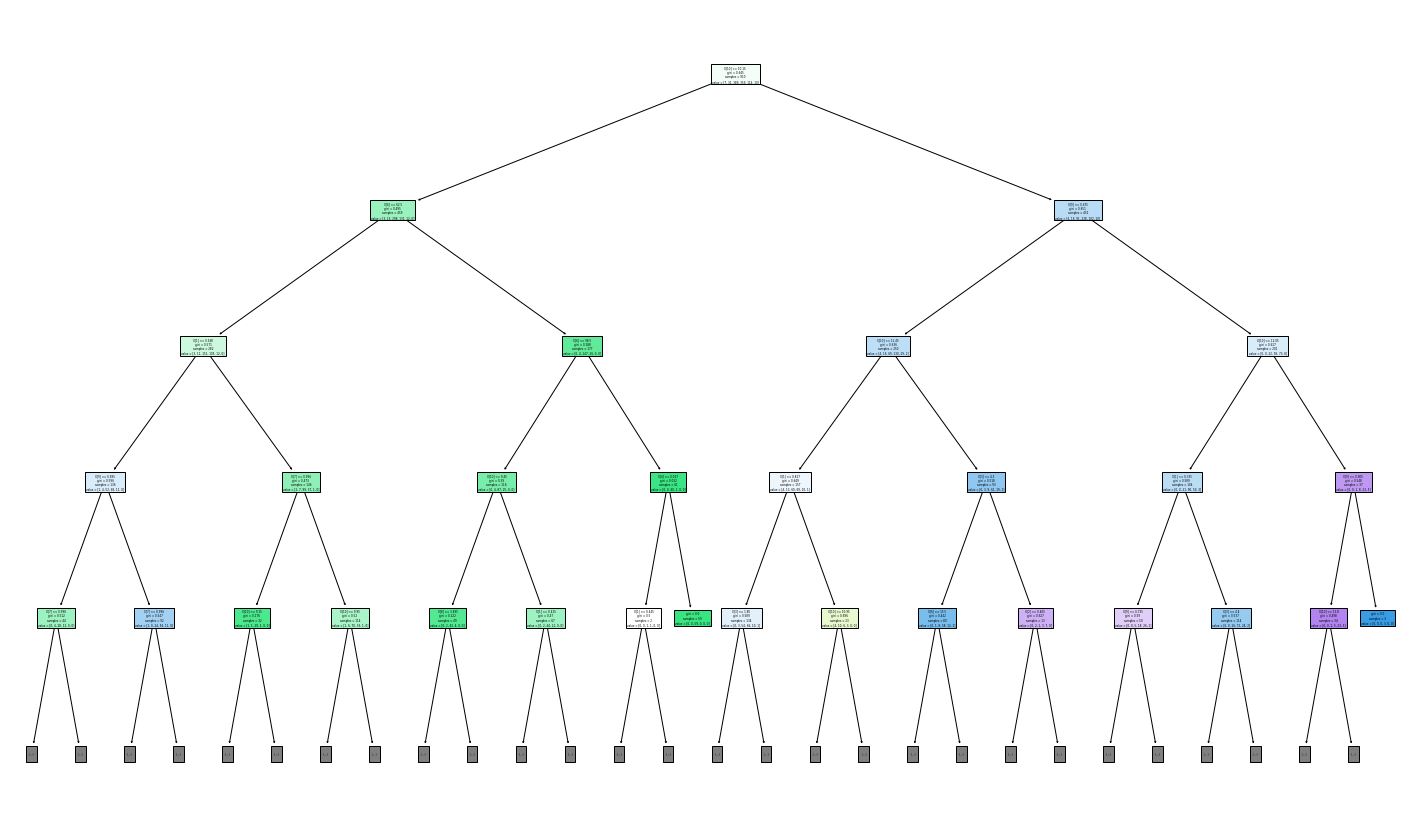

In [54]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

In [53]:
fig.savefig("decistion_tree_classifier.png")

In [22]:
y_predict=model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,y_predict)

0.48775055679287305

In [55]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [56]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [57]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [58]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'random'}

In [59]:
model_with_best_params=DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,min_samples_leaf= 3,min_samples_split= 5,splitter='random')

In [60]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, splitter='random')

[Text(0.45170454545454547, 0.9166666666666666, 'X[10] <= 9.992\nentropy = 1.721\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.20454545454545456, 0.75, 'X[6] <= 134.662\nentropy = 1.191\nsamples = 387\nvalue = [3, 13, 265, 100, 6, 0]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[0] <= 10.378\nentropy = 1.225\nsamples = 367\nvalue = [3, 13, 245, 100, 6, 0]'),
 Text(0.09090909090909091, 0.4166666666666667, 'X[8] <= 3.449\nentropy = 1.102\nsamples = 323\nvalue = [1, 11, 226, 83, 2, 0]'),
 Text(0.045454545454545456, 0.25, 'X[1] <= 0.66\nentropy = 1.092\nsamples = 267\nvalue = [0, 11, 189, 65, 2, 0]'),
 Text(0.022727272727272728, 0.08333333333333333, 'entropy = 1.08\nsamples = 198\nvalue = [0, 5, 137, 54, 2, 0]'),
 Text(0.06818181818181818, 0.08333333333333333, 'entropy = 1.036\nsamples = 69\nvalue = [0, 6, 52, 11, 0, 0]'),
 Text(0.13636363636363635, 0.25, 'X[10] <= 9.614\nentropy = 1.025\nsamples = 56\nvalue = [1, 0, 37, 18, 0, 0]'),
 Text(0.11363636363636363, 0.08333

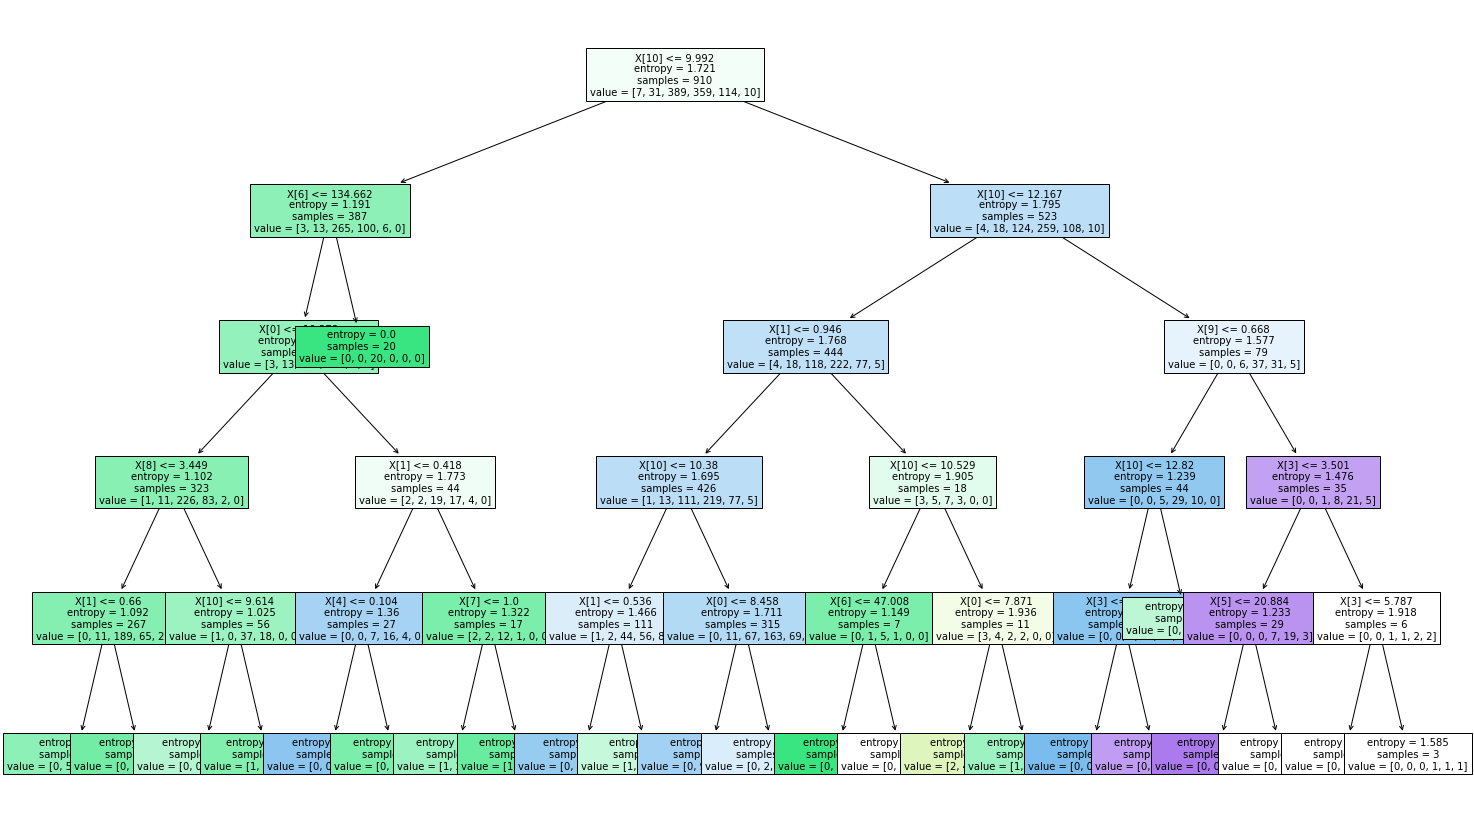

In [65]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [61]:
y_prediction2=model_with_best_params.predict(X_test)

In [62]:
accuracy_score(y_test,y_prediction2)

0.5456570155902004

**logistic regression, SVM ,  going forward(RF,XB,GB,AB)**

**Implement the decision tree regressor**
dataset: **https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption**
        
take_refrence_from_here: **https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor**